In [59]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

# Dataset
https://www.kaggle.com/datasets/abhia1999/chronic-kidney-disease

In [60]:
df=pd.read_csv('new_model.csv')
df

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0,0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0,0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0,0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0,0


In [4]:
df.sample(5)

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
122,70.0,1.020,1.0,0.0,1.0,219.0,12.2,130.00,3.80,6.0,8406.0,4.71,1.0,1
25,60.0,1.025,0.0,0.0,1.0,75.0,1.9,141.00,5.20,9.9,8400.0,3.70,1.0,1
293,76.0,1.020,0.0,0.0,1.0,19.0,1.2,150.00,4.80,14.9,4700.0,5.40,0.0,0
349,70.0,1.025,0.0,0.0,1.0,36.0,1.1,150.00,3.50,14.5,9400.0,6.10,0.0,0
240,70.0,1.015,1.0,0.0,1.0,46.0,1.4,137.53,4.63,11.4,5000.0,4.10,1.0,1


# Exploratory Data Analysis(EDA)

<Axes: xlabel='Htn', ylabel='count'>

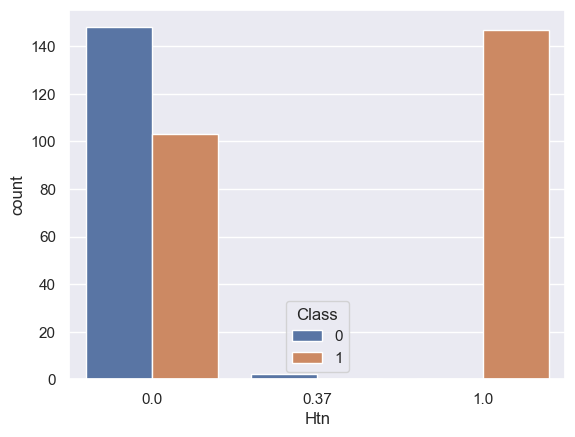

In [5]:
sns.countplot(data=df,x="Htn",hue="Class")

<Axes: xlabel='Bp', ylabel='Count'>

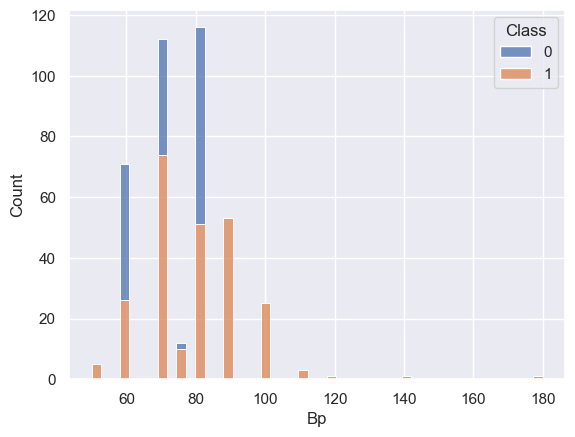

In [6]:
sns.histplot(data=df, x="Bp", hue="Class", multiple="stack")

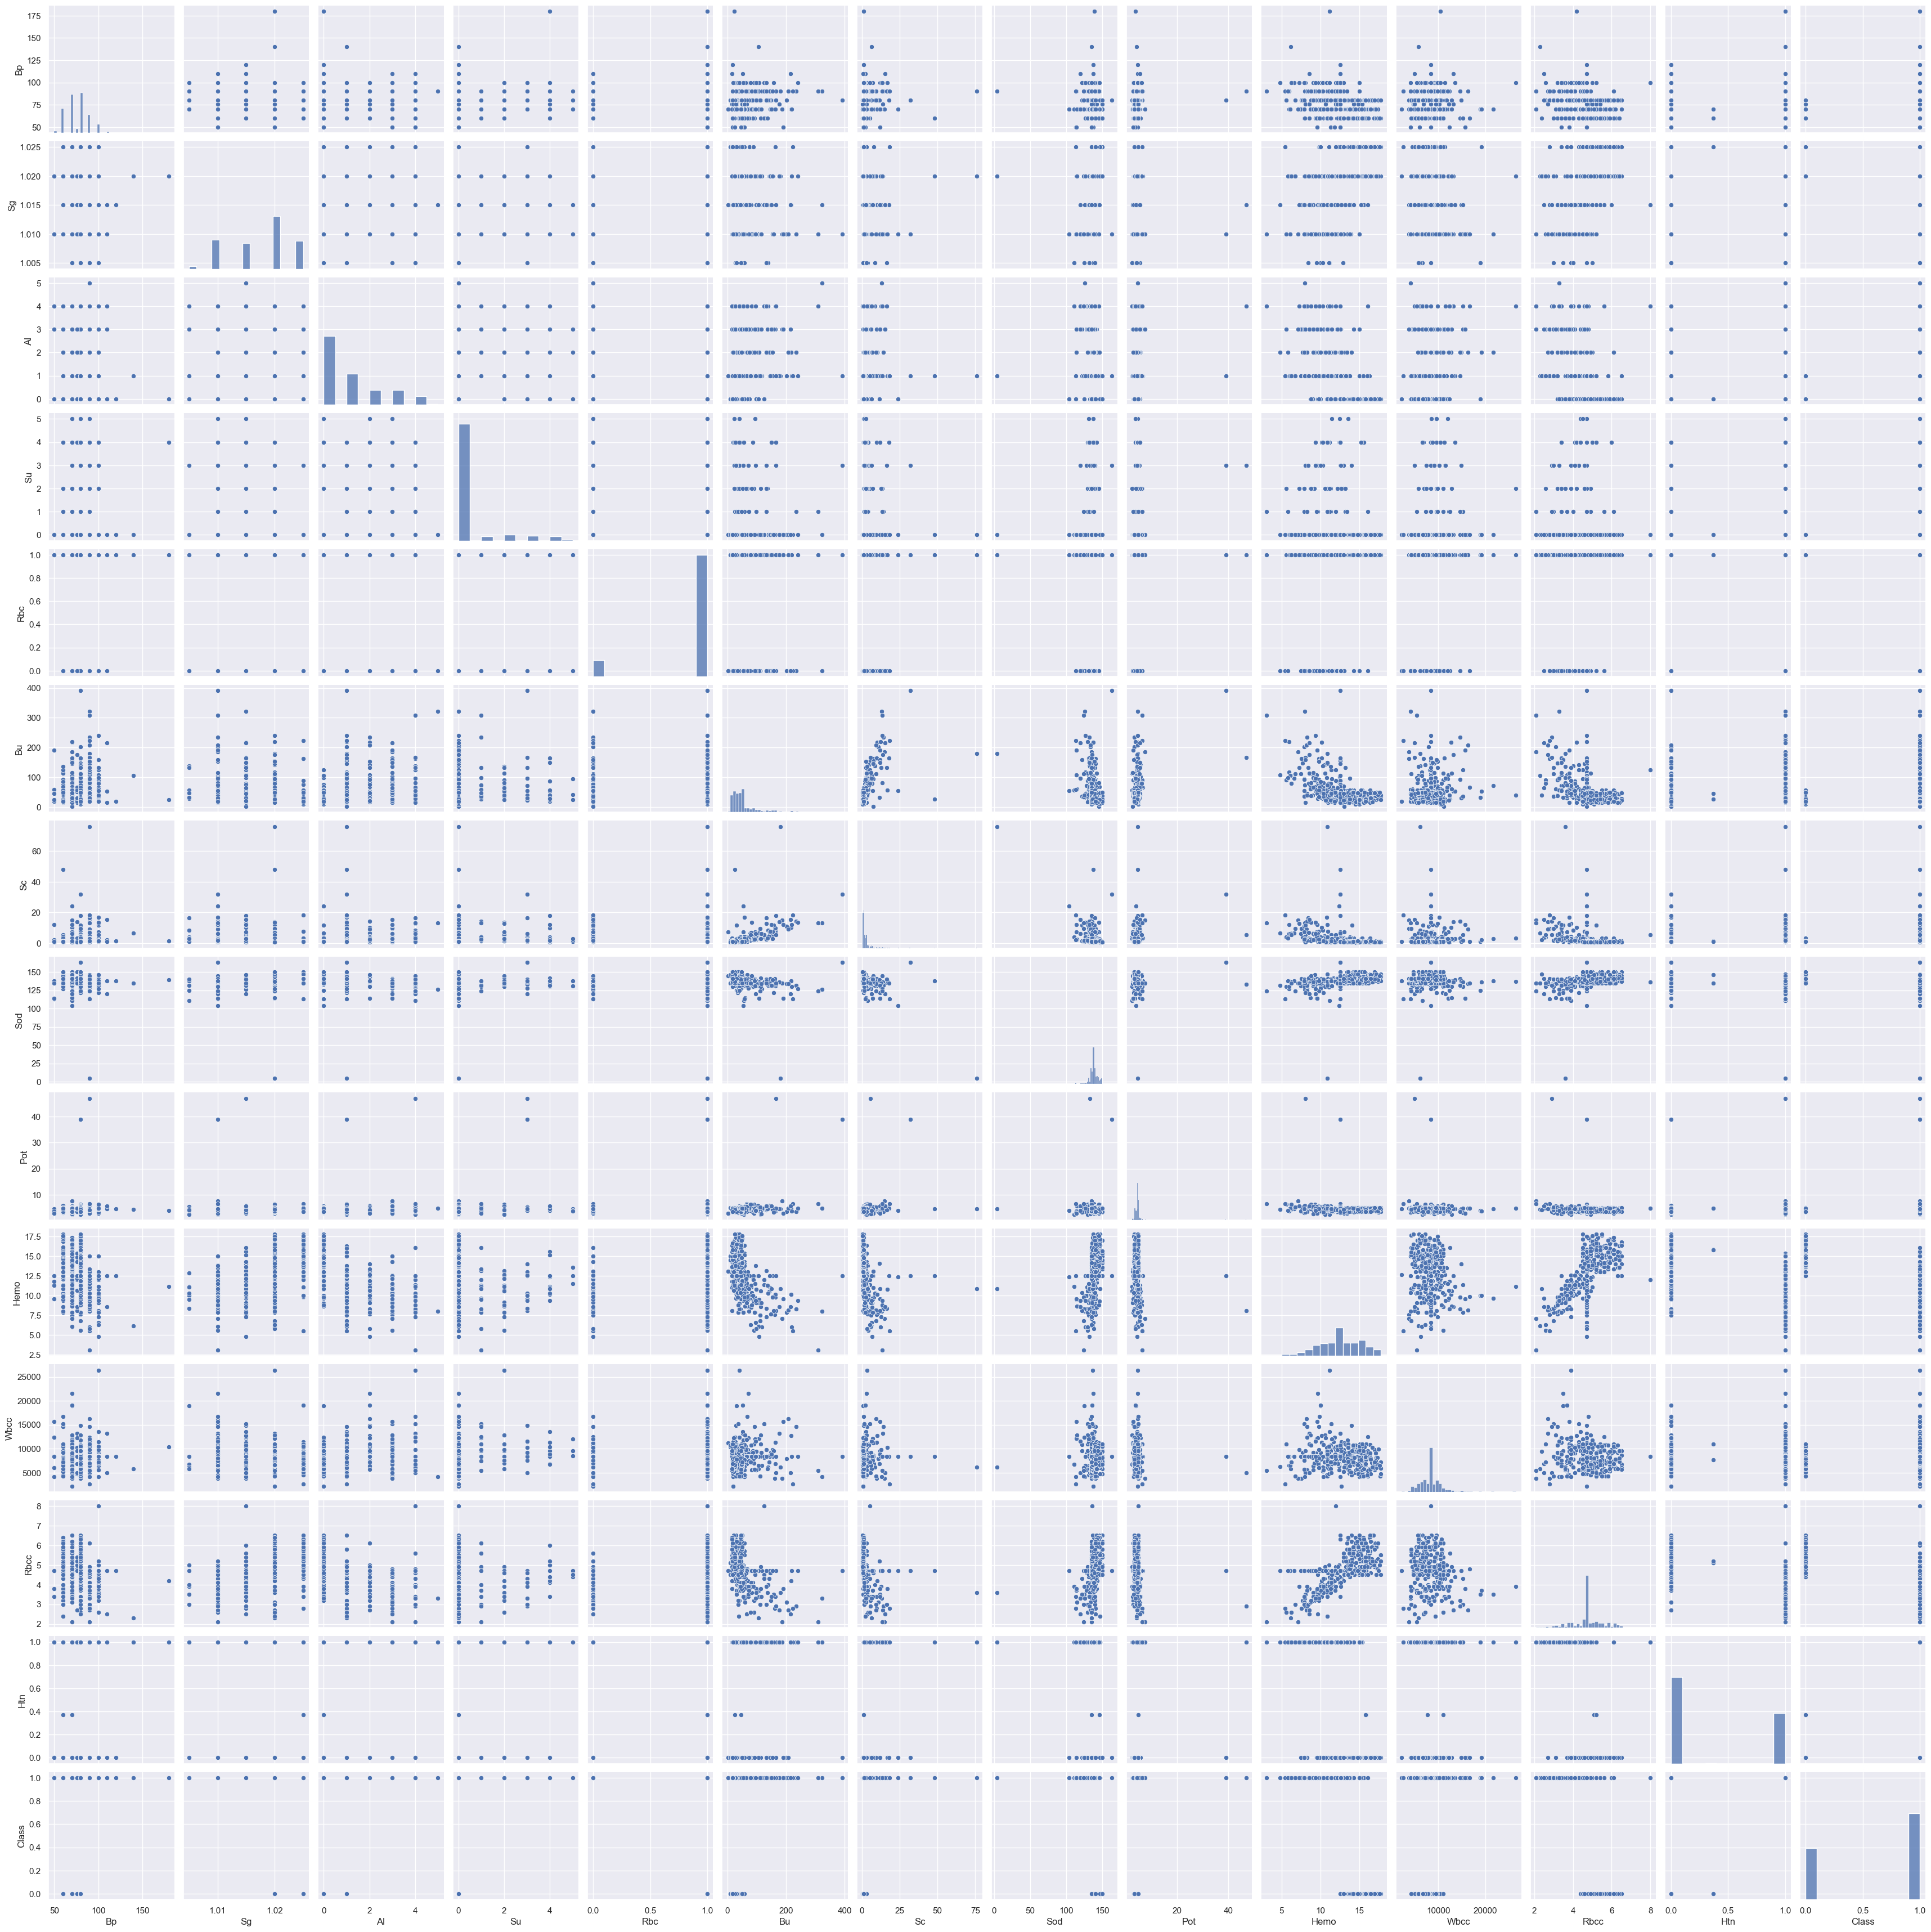

In [6]:
sns.pairplot(df)

# Data preprocessing

In [7]:
df.isnull().sum()  ##the dataset contains no null values

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

In [8]:
df.shape

(400, 14)

In [9]:
df.describe()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

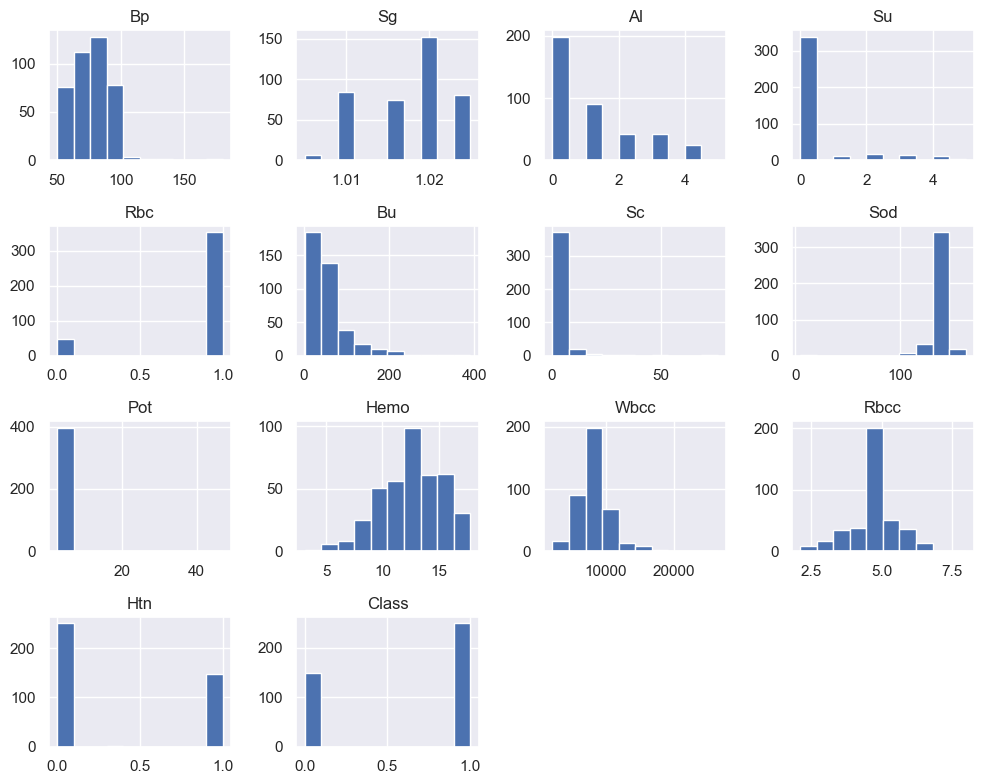

In [13]:
df.hist(figsize=(10,8))   #checking data distribution
plt.tight_layout()
plt.show()

In [9]:
#replace 0 value with NaN
df_copy = df.copy(deep = True) #deep = True -> Buat salinan indeks dan data dalam dataframe
df_copy[['Bp','Sg','Bu','Sc','Sod','Pot','Hemo','Wbcc','Rbcc']] = df_copy[['Bp','Sg','Bu','Sc','Sod','Pot','Hemo','Wbcc','Rbcc']].replace(0,np.NaN)

# Showing the Count of NANs
print(df_copy.isnull().sum())

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64


# Check if the class label is balanced or not

1    250
0    150
Name: Class, dtype: int64


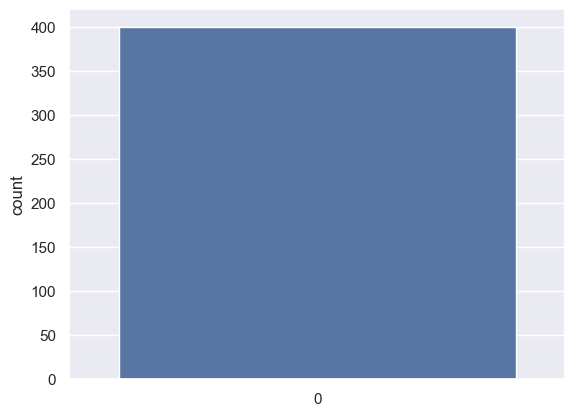

In [10]:
sns.countplot(df['Class'])
print(df.Class.value_counts())

# Do Oversampling Minority Class to Balance the class label

In [61]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['Class']==1)] 
df_minority = df[(df['Class']==0)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 n_samples= 250, 
                                 random_state=0)  
                                                  
# Combine majority class with upsampled minority class
df2 = pd.concat([df_minority_upsampled, df_majority])

0    250
1    250
Name: Class, dtype: int64


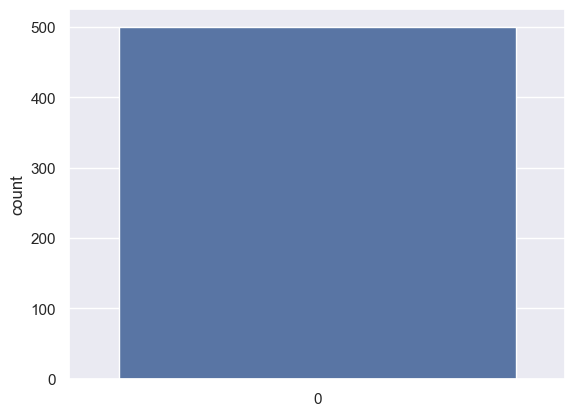

In [19]:
sns.countplot(df2['Class'])
print(df2.Class.value_counts())

# Check the outliers using Box plots

<Axes: xlabel='Bp'>

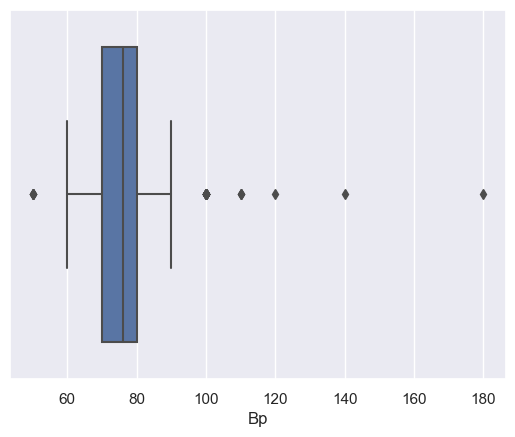

In [12]:
sns.boxplot(x=df2["Bp"])

<Axes: xlabel='Sg'>

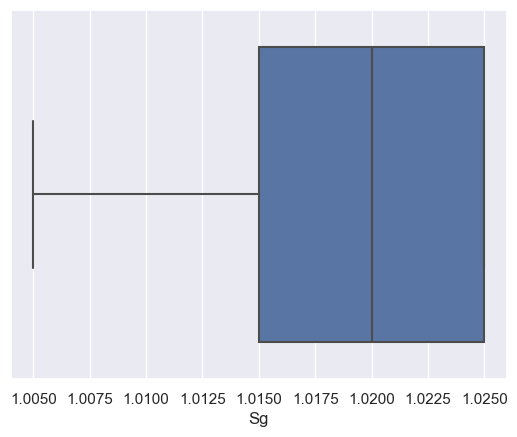

In [13]:
sns.boxplot(x=df2["Sg"])

<Axes: xlabel='Al'>

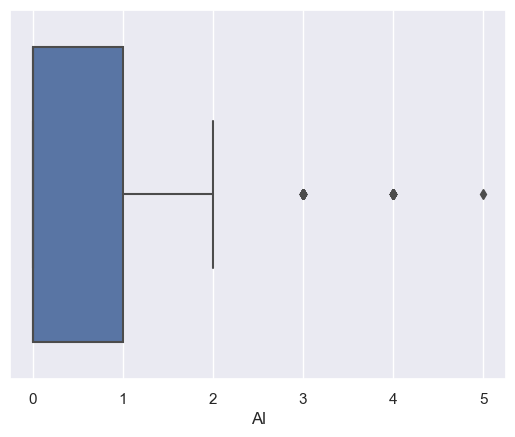

In [14]:
sns.boxplot(x=df2["Al"])

<Axes: xlabel='Su'>

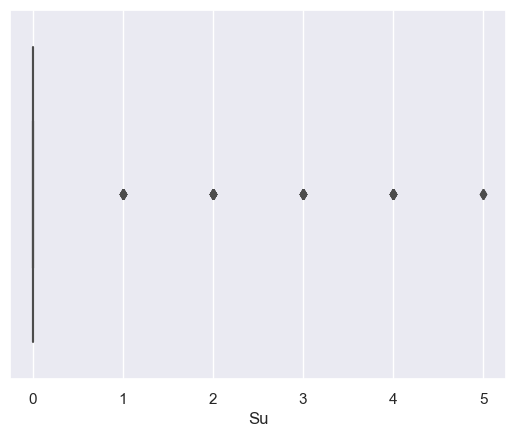

In [15]:
sns.boxplot(x=df2["Su"])

<Axes: xlabel='Rbc'>

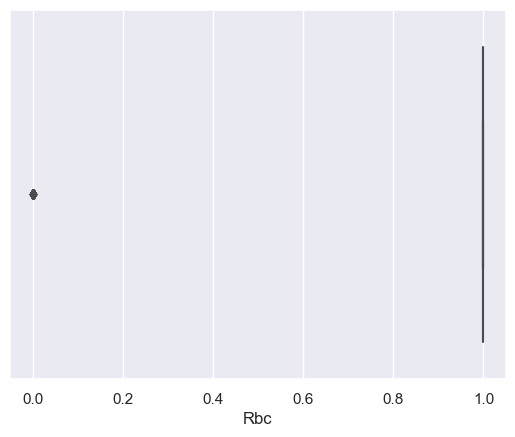

In [18]:
sns.boxplot(x=df2["Rbc"])

<Axes: xlabel='Sod'>

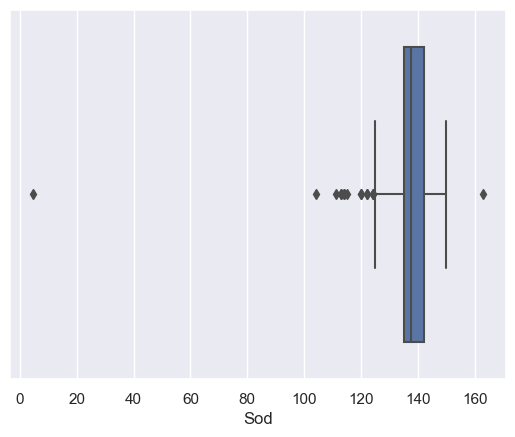

In [17]:
sns.boxplot(x=df2["Sod"])

<Axes: xlabel='Wbcc'>

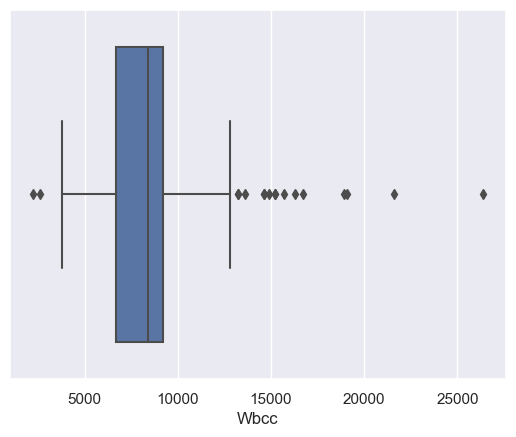

In [19]:
sns.boxplot(x=df2["Wbcc"])

<Axes: xlabel='Pot'>

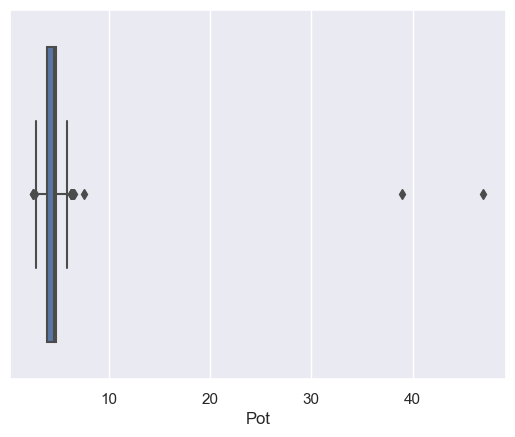

In [20]:
sns.boxplot(x=df2["Pot"])

<Axes: xlabel='Hemo'>

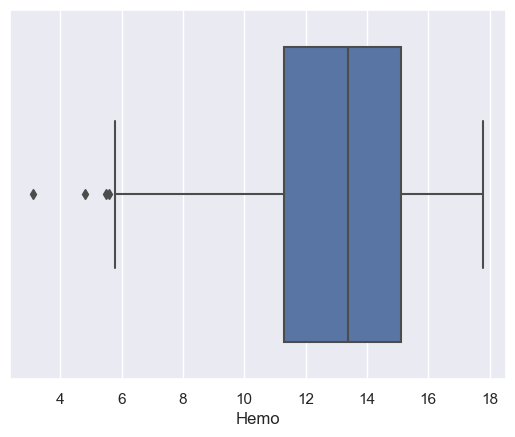

In [21]:
sns.boxplot(x=df2["Hemo"])

<Axes: xlabel='Rbcc'>

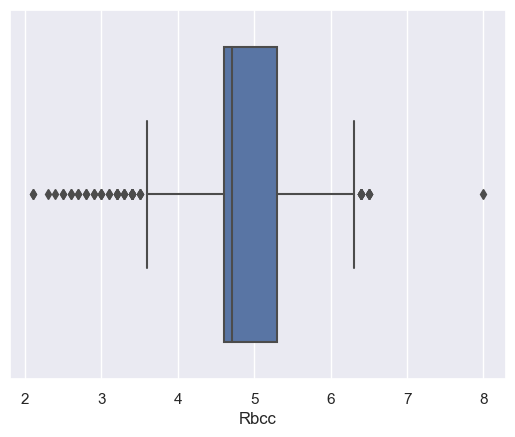

In [22]:
sns.boxplot(x=df2["Rbcc"])

# Remove outliers using Z-Score

In [23]:
import scipy.stats as stats
z=np.abs(stats.zscore(df2))
data_clean=df2[(z<3).all(axis=1)]
data_clean.shape

(420, 14)

# Heatmap  data correlation

<Axes: >

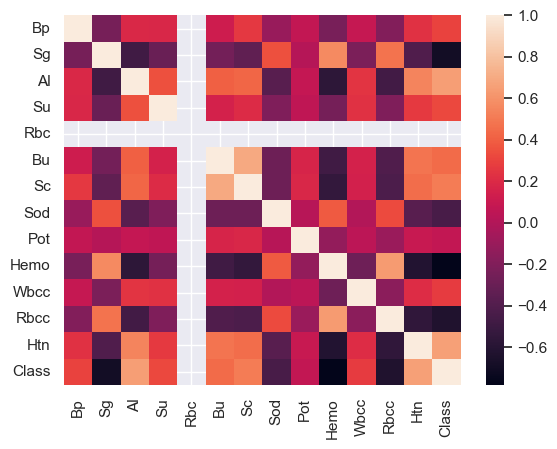

In [24]:
sns.heatmap(data_clean.corr(),fmt='.2g')

In [25]:
#RBC  attribute is irrelevant, so we will remove it
data_clean2=df.drop(columns=['Rbc'])

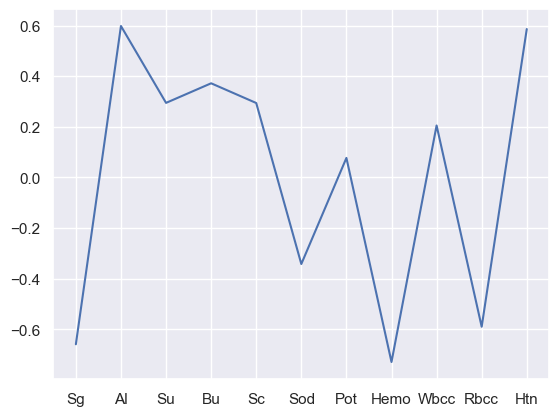

In [27]:
corr = data_clean2[data_clean2.columns[1:]].corr()['Class'][:-1]
plt.plot(corr)
plt.xticks(rotation=90)
plt.show()

<Axes: >

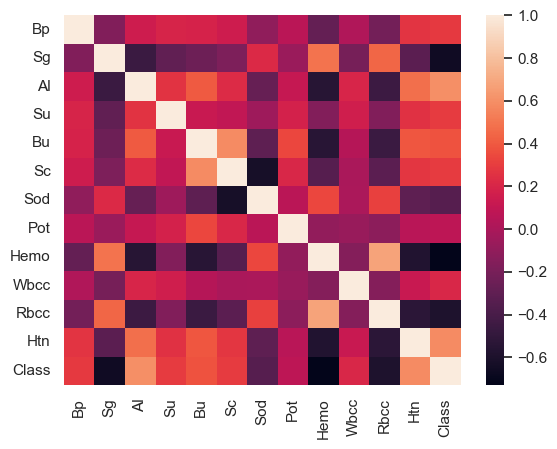

In [28]:
sns.heatmap(data_clean2.corr(),fmt='.2g')

# Machine Learning Model building

In [62]:
X=data_clean2.drop('Class',axis=1)
Y=data_clean2['Class']

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

# Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0)
lr.fit(X_train,Y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [49]:
Y_pred=lr.predict(X_test)
print("Accuracy Score: ", round(accuracy_score(Y_test,Y_pred)*100,2),"%")

Accuracy Score:  93.75 %


In [46]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(Y_test, Y_pred)))
print('Precision Score : ',(precision_score(Y_test, Y_pred)))
print('Recall Score : ',(recall_score(Y_test, Y_pred)))

F-1 Score :  0.9504950495049506
Precision Score :  0.9795918367346939
Recall Score :  0.9230769230769231


Text(0.5, 1.0, 'Accuracy Score: 93.75')

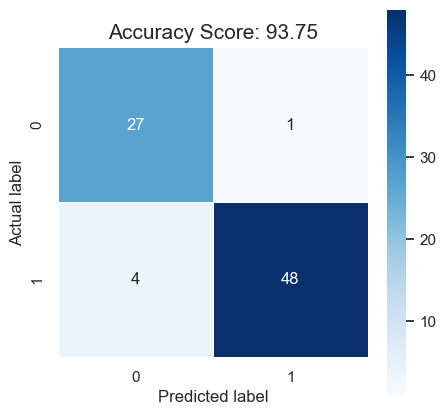

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(lr.score(X_test, Y_test)*100)
plt.title(all_sample_title, size = 15)

# K-Nearest Neighbour Algorithm

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [54]:
Y_pred=knn.predict(X_test)

In [55]:
print("Accuracy Score :", round(accuracy_score(Y_test, Y_pred)*100 ,2), "%")

Accuracy Score : 62.5 %


In [56]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(Y_test, Y_pred)))
print('Precision Score : ',(precision_score(Y_test, Y_pred)))
print('Recall Score : ',(recall_score(Y_test, Y_pred)))

F-1 Score :  0.6875
Precision Score :  0.75
Recall Score :  0.6346153846153846


Text(0.5, 1.0, 'Accuracy Score: 93.75')

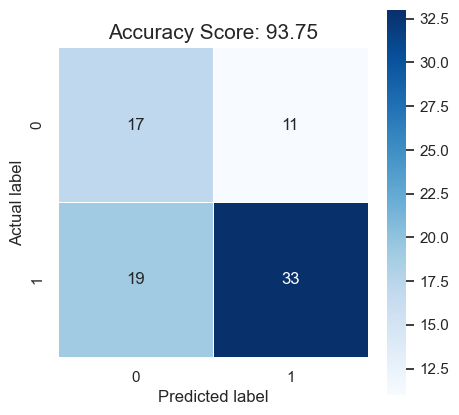

In [57]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(lr.score(X_test, Y_test)*100)
plt.title(all_sample_title, size = 15)

# AdaBoost

In [68]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(random_state=0)
ada.fit(X_train,Y_train)

AdaBoostClassifier(random_state=0)

In [69]:
Y_pred=ada.predict(X_test)
print("Accuracy Score: ", round(accuracy_score(Y_test,Y_pred)*100,2),"%")

Accuracy Score:  98.75 %


In [70]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(Y_test, Y_pred)))
print('Precision Score : ',(precision_score(Y_test, Y_pred)))
print('Recall Score : ',(recall_score(Y_test, Y_pred)))

F-1 Score :  0.9902912621359222
Precision Score :  1.0
Recall Score :  0.9807692307692307


Text(0.5, 1.0, 'Accuracy Score: 98.75')

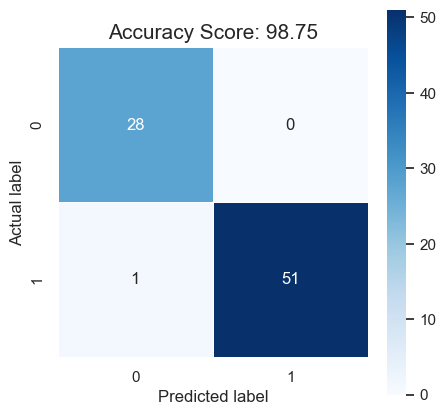

In [72]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(ada.score(X_test, Y_test)*100)
plt.title(all_sample_title, size = 15)

# Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=0)
rfc.fit(X_train,Y_train)

RandomForestClassifier(random_state=0)

In [74]:
Y_pred=rfc.predict(X_test)
print("Accuracy Score: ", round(accuracy_score(Y_test,Y_pred)*100,2),"%")

Accuracy Score:  100.0 %


In [75]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(Y_test, Y_pred)))
print('Precision Score : ',(precision_score(Y_test, Y_pred)))
print('Recall Score : ',(recall_score(Y_test, Y_pred)))

F-1 Score :  1.0
Precision Score :  1.0
Recall Score :  1.0


Text(0.5, 1.0, 'Accuracy Score: 100.0')

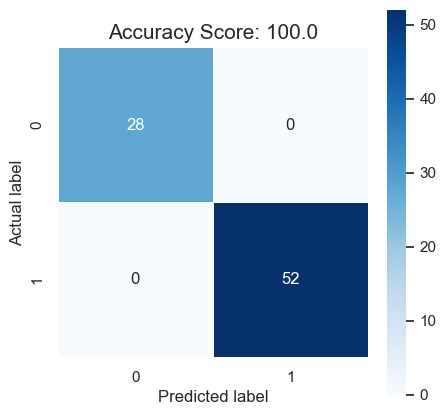

In [76]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(rfc.score(X_test, Y_test)*100)
plt.title(all_sample_title, size = 15)